In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('../../venv/updated_pollution_dataset_2.csv')

In [3]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4         29.4      93.8   10.3  22.7  45.1  11.8  2.03   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           11.1                 551        Good  
1                           12.7                 303        Good  
2                            3.1                 674        Poor  
3                            4.6                 735        Poor  
4                            5.4                 486        Poor

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4250 non-null   float64
 1   Humidity                       4250 non-null   float64
 2   PM2.5                          4250 non-null   float64
 3   PM10                           4250 non-null   float64
 4   NO2                            4250 non-null   float64
 5   SO2                            4250 non-null   float64
 6   CO                             4250 non-null   float64
 7   Proximity_to_Industrial_Areas  4250 non-null   float64
 8   Population_Density             4250 non-null   int64  
 9   Air Quality                    4250 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 332.2+ KB


In [5]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean     30.021671    69.935576    20.057929    30.151482    26.399671   
std       7.079486    16.402863    25.140063    28.294709     9.415399   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      24.700000    57.800000     4.500000    11.700000    19.500000   
50%      28.700000    69.600000    11.600000    21.200000    25.000000   
75%      34.500000    80.200000    25.600000    37.800000    32.500000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  4250.000000  4250.000000                    4250.000000   
mean     10.004471     1.500428                       8.684212   
std       7.111211     0.586232                       3.778317   
min      -6.200000     0.650000                       2.500000   
25%       4.900000     1.010000                       5.225000   
50%       7.500000     1.310000                       9.700000   
75%      14.175000     1.930000                      11.300000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         4250.000000  
mean           497.283059  
std            158.671435  
min            188.000000  
25%            376.000000  
50%            494.000000  
75%            601.000000  
max            957.000000

In [6]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [7]:
#Checking for null values
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [8]:
#checking for unique values
df.nunique()

Temperature                      362
Humidity                         722
PM2.5                            777
PM10                             915
NO2                              445
SO2                              346
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        2
dtype: int64

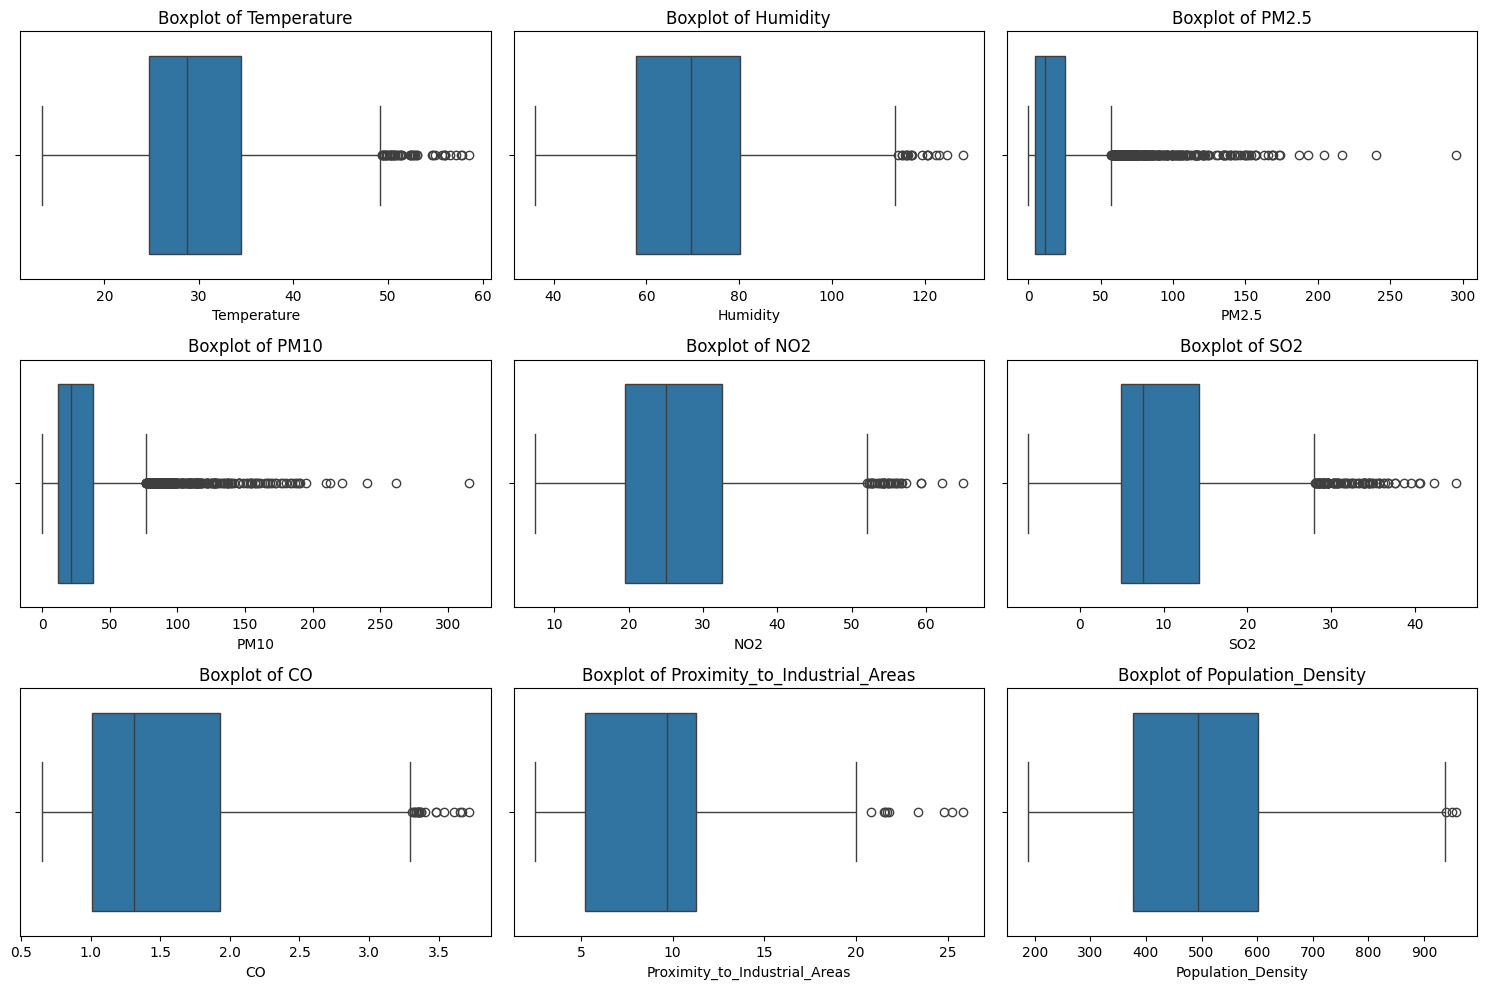

In [9]:
#Boxplot
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [10]:
#calculating Zscores
from scipy.stats import zscore

zscores = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']].apply(zscore)
print(zscores.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0    -0.412744 -1.880111 -0.555272 -0.843065 -1.370222 -0.661635 -0.597834   
1    -0.497506  0.046609 -0.523446 -0.500205 -0.477962 -0.619443 -0.836676   
2     1.324875  1.625787 -0.217126  0.189051  1.752689  1.110424  0.545193   
3     1.649795  0.766080 -0.730312 -0.507274  0.499276  0.379098  0.511072   
4    -0.087823  1.455065 -0.388188 -0.263383  1.986377  0.252522  0.903455   

   Proximity_to_Industrial_Areas  Population_Density  
0                       0.639457            0.338582  
1                       1.062976           -1.224580  
2                      -1.478137            1.113860  
3                      -1.081088            1.498347  
4                      -0.869328           -0.071118  


In [11]:
zscores.shape

(4250, 9)

In [12]:
#removing outliers with zscores > 3
for column in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']:
    df = df[(np.abs(zscore(df[column]))<3)] 

from scipy.stats import zscore
for column in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']: #'PM2.5', 'PM10', 'SO2'

    print(f"{column} percentile values: ", df[column].quantile([0.001, 0.01, 0.05, 0.9, 0.95, 0.99,0.999, 0.9999]))
    min_thresh, max_thresh = df[column].quantile([0.005,0.995])
    print(f"Min threshold : {min_thresh} and Max threshold : {max_thresh}")

    if column in ['PM10', 'SO2', 'PM2.5']:
        df = df[(df[column] >= min_thresh)]

    df = df[(df[column] <= max_thresh)]   

In [13]:
df.shape

(3952, 10)

In [14]:
df[df['SO2'] < 0]

Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
142          25.9      64.2    1.5  10.3  23.6 -0.4  0.93   
248          24.3      44.2    9.5  12.5  18.8 -0.2  0.83   
331          25.0      77.9    2.1   8.6  12.3 -0.3  1.09   
357          40.1      62.1   47.7  67.7  31.6 -4.1  2.54   
397          23.9      54.6    0.8   5.8  18.0 -0.6  0.92   
545          26.7      66.0    0.5   5.4  20.9 -0.6  0.87   
705          21.8      72.4    4.0   7.5  19.4 -0.3  1.15   
728          24.4      63.7   31.1  34.2  16.4 -0.2  0.99   
1038         36.0      89.8   33.0  47.9  26.0 -0.1  1.74   
1222         44.1      72.6   66.5  86.1  33.2 -0.2  2.49   
1416         21.5      61.4    4.2  10.4  22.1 -0.1  0.95   
1681         32.7      82.0   64.9  78.4  30.5 -1.9  1.93   
1721         41.2      86.9   26.7  40.8  39.5 -0.2  1.62   
1860         30.4     103.6   17.5  40.4  24.1 -6.2  2.21   
2102         26.0      72.8    3.4  10.2  25.1 -0.2  1.05   
2162         29.8      80.8   10.4  14.9  17.1 -0.4  1.53   
2435         26.1      67.9   19.4  21.4  16.0 -1.4  1.11   
2467         30.1      59.5    3.9   8.3  19.6 -0.4  1.00   
2528         31.9      61.4   29.5  31.9  28.7 -0.3  1.06   
2623         25.6      73.6    4.9   9.3  23.1 -0.1  1.08   
3159         26.2      56.5   20.4  28.2  14.2 -0.4  0.88   
3654         33.0      84.1    1.6  23.8  31.4 -3.4  2.10   
4189         33.8      66.9    5.8  11.0  15.4 -1.2  1.06   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
142                            11.5                 386        Good  
248                            10.6                 341        Good  
331                            14.1                 269        Good  
357                             4.9                 570        Poor  
397                            13.2                 363        Good  
545                            10.1                 422        Good  
705                            12.2                 490        Good  
728                            10.7                 501        Good  
1038                            4.3                 490        Poor  
1222                            2.7                 565        Poor  
1416                           10.9                 447        Good  
1681                            3.4                 766        Poor  
1721                            5.6                 783        Poor  
1860                            7.3                 521        Poor  
2102                           12.5                 437        Good  
2162                            5.7                 502        Good  
2435                           13.4                 528        Good  
2467                           15.3                 488        Good  
2528                           11.1                 212        Good  
2623                           18.8                 547        Good  
3159                           12.4                 427        Good  
3654                            4.3                 493        Poor  
4189                           14.4                 298        Good

In [15]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  3952.000000  3952.000000  3952.000000  3952.000000  3952.000000   
mean     29.359337    68.705137    15.985020    25.506427    25.444737   
std       6.556841    15.799369    16.012197    19.017787     8.685232   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      24.500000    56.800000     4.100000    11.100000    19.000000   
50%      28.100000    68.250000    10.600000    19.800000    24.300000   
75%      33.500000    78.725000    22.500000    34.100000    31.025000   
max      51.100000   117.300000    86.200000    92.000000    52.700000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  3952.000000  3952.000000                    3952.000000   
mean      9.280693     1.435248                       8.926872   
std       6.320607     0.533430                       3.663612   
min      -6.200000     0.650000                       2.500000   
25%       4.700000     1.000000                       5.500000   
50%       7.100000     1.190000                      10.100000   
75%      12.900000     1.820000                      11.400000   
max      29.700000     3.070000                      20.000000   

       Population_Density  
count         3952.000000  
mean           485.418016  
std            153.529286  
min            188.000000  
25%            368.000000  
50%            484.000000  
75%            589.000000  
max            939.000000

In [16]:
#MinMax Normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
df[features] = scaler.fit_transform(df[features])

In [17]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [18]:
df[features].head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.363395  0.038130  0.070766  0.070499  0.134658  0.320334  0.206612   
1     0.347480  0.426814  0.080046  0.175705  0.320088  0.328691  0.148760   
2     0.689655  0.745387  0.169374  0.387202  0.783664  0.671309  0.483471   
3     0.750663  0.571956  0.019722  0.173536  0.523179  0.526462  0.475207   
4     0.424403  0.710947  0.119490  0.248373  0.832230  0.501393  0.570248   

   Proximity_to_Industrial_Areas  Population_Density  
0                       0.491429            0.483356  
1                       0.582857            0.153129  
2                       0.034286            0.647137  
3                       0.120000            0.728362  
4                       0.165714            0.396804

In [19]:
#Mapping Target Column i.e Good = 1, Poor = 0
if df['Air Quality'].dtype == 'object':
    df['Air Quality'] = df['Air Quality'].map({'Good' : 1, 'Poor': 0})

In [20]:
df.head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.363395  0.038130  0.070766  0.070499  0.134658  0.320334  0.206612   
1     0.347480  0.426814  0.080046  0.175705  0.320088  0.328691  0.148760   
2     0.689655  0.745387  0.169374  0.387202  0.783664  0.671309  0.483471   
3     0.750663  0.571956  0.019722  0.173536  0.523179  0.526462  0.475207   
4     0.424403  0.710947  0.119490  0.248373  0.832230  0.501393  0.570248   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       0.491429            0.483356            1  
1                       0.582857            0.153129            1  
2                       0.034286            0.647137            0  
3                       0.120000            0.728362            0  
4                       0.165714            0.396804            0

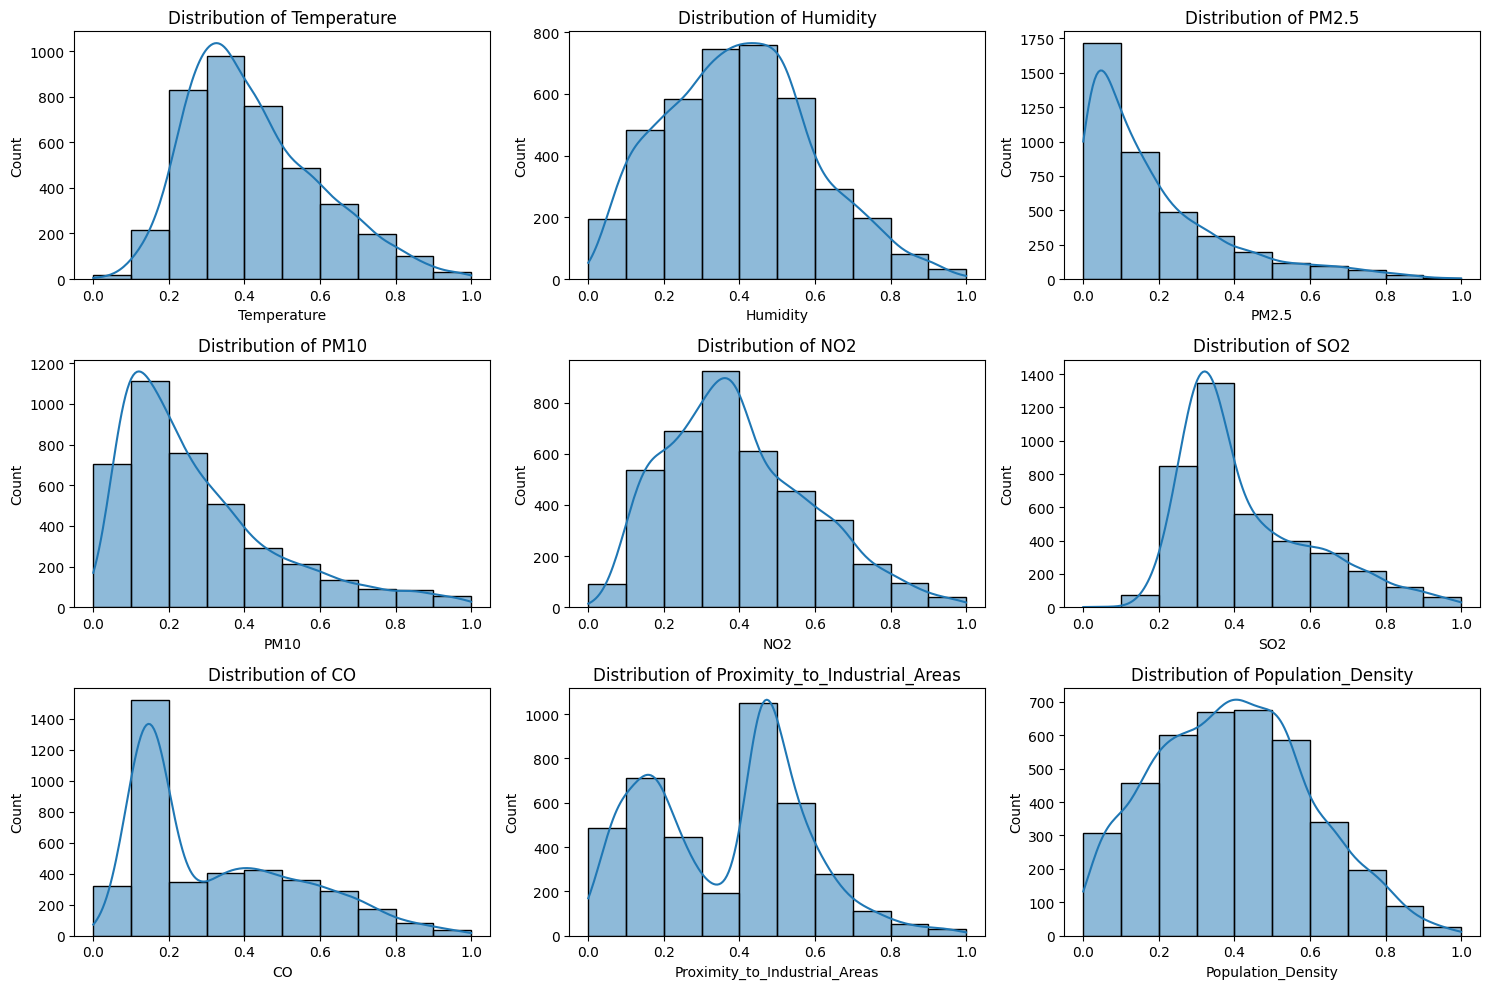

In [21]:
#Histograms of each feature
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(features):
    sns.histplot(x=df[column], ax = axes[i], kde=True, bins=10)
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

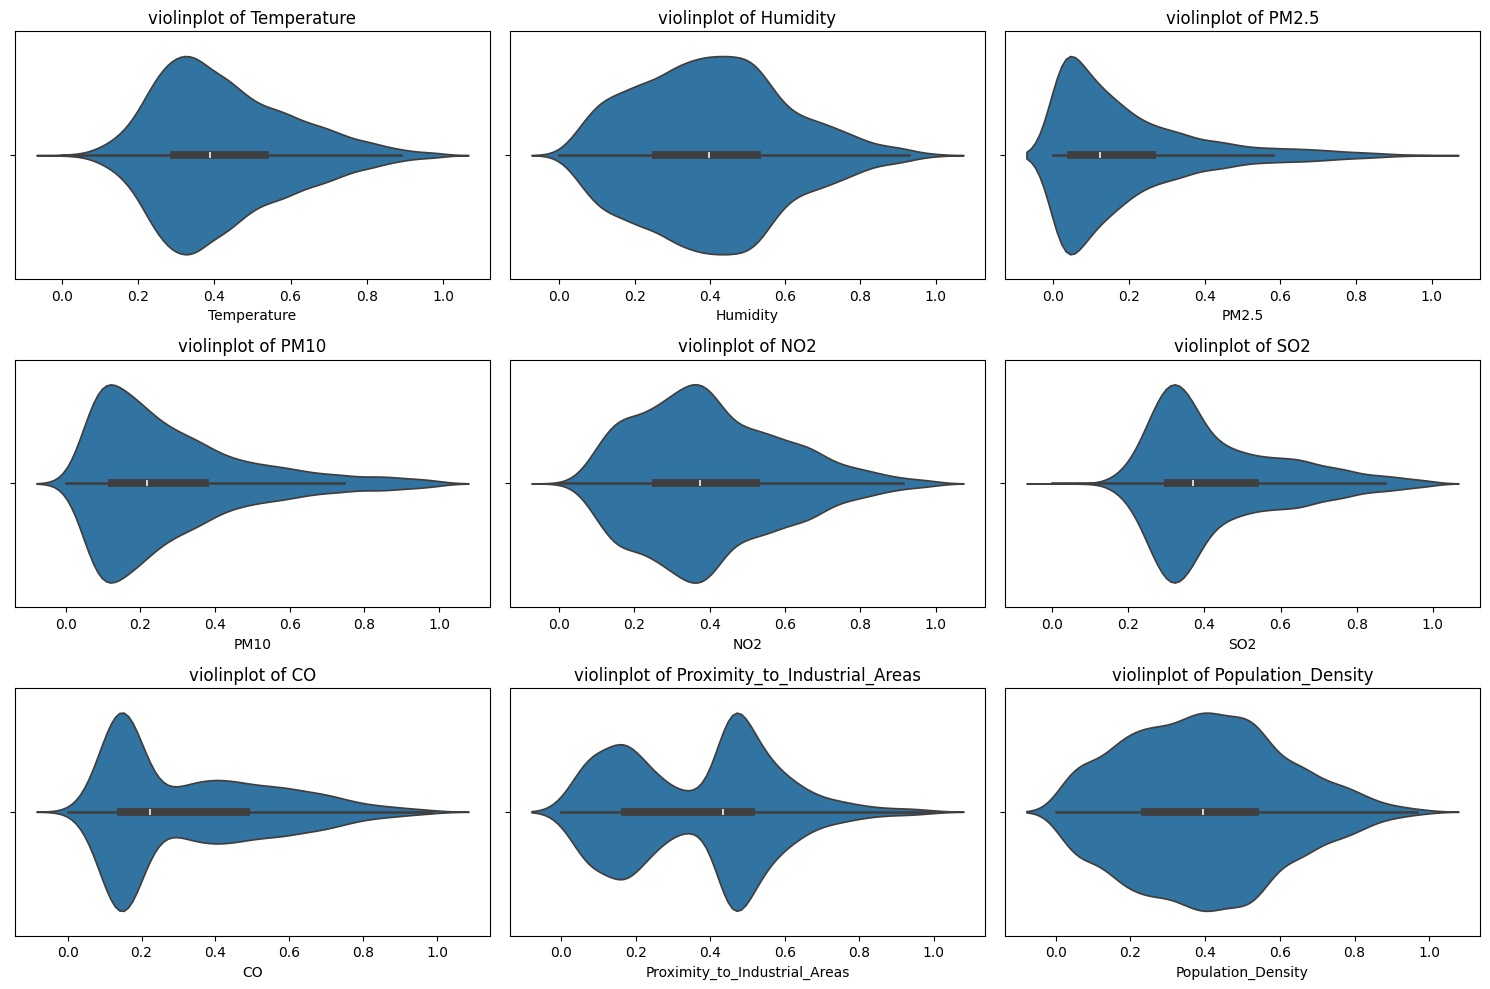

In [22]:
#Violin plots of each feature
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(features):
    sns.violinplot(x=df[column], ax = axes[i])
    axes[i].set_title(f'violinplot of {column}')
plt.tight_layout()
plt.show()

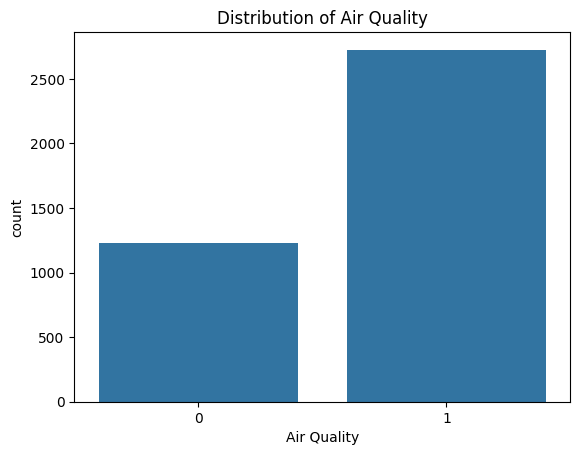

In [23]:
#Target variable distribution
sns.countplot(x = 'Air Quality', data =df)
plt.title("Distribution of Air Quality")
plt.show()

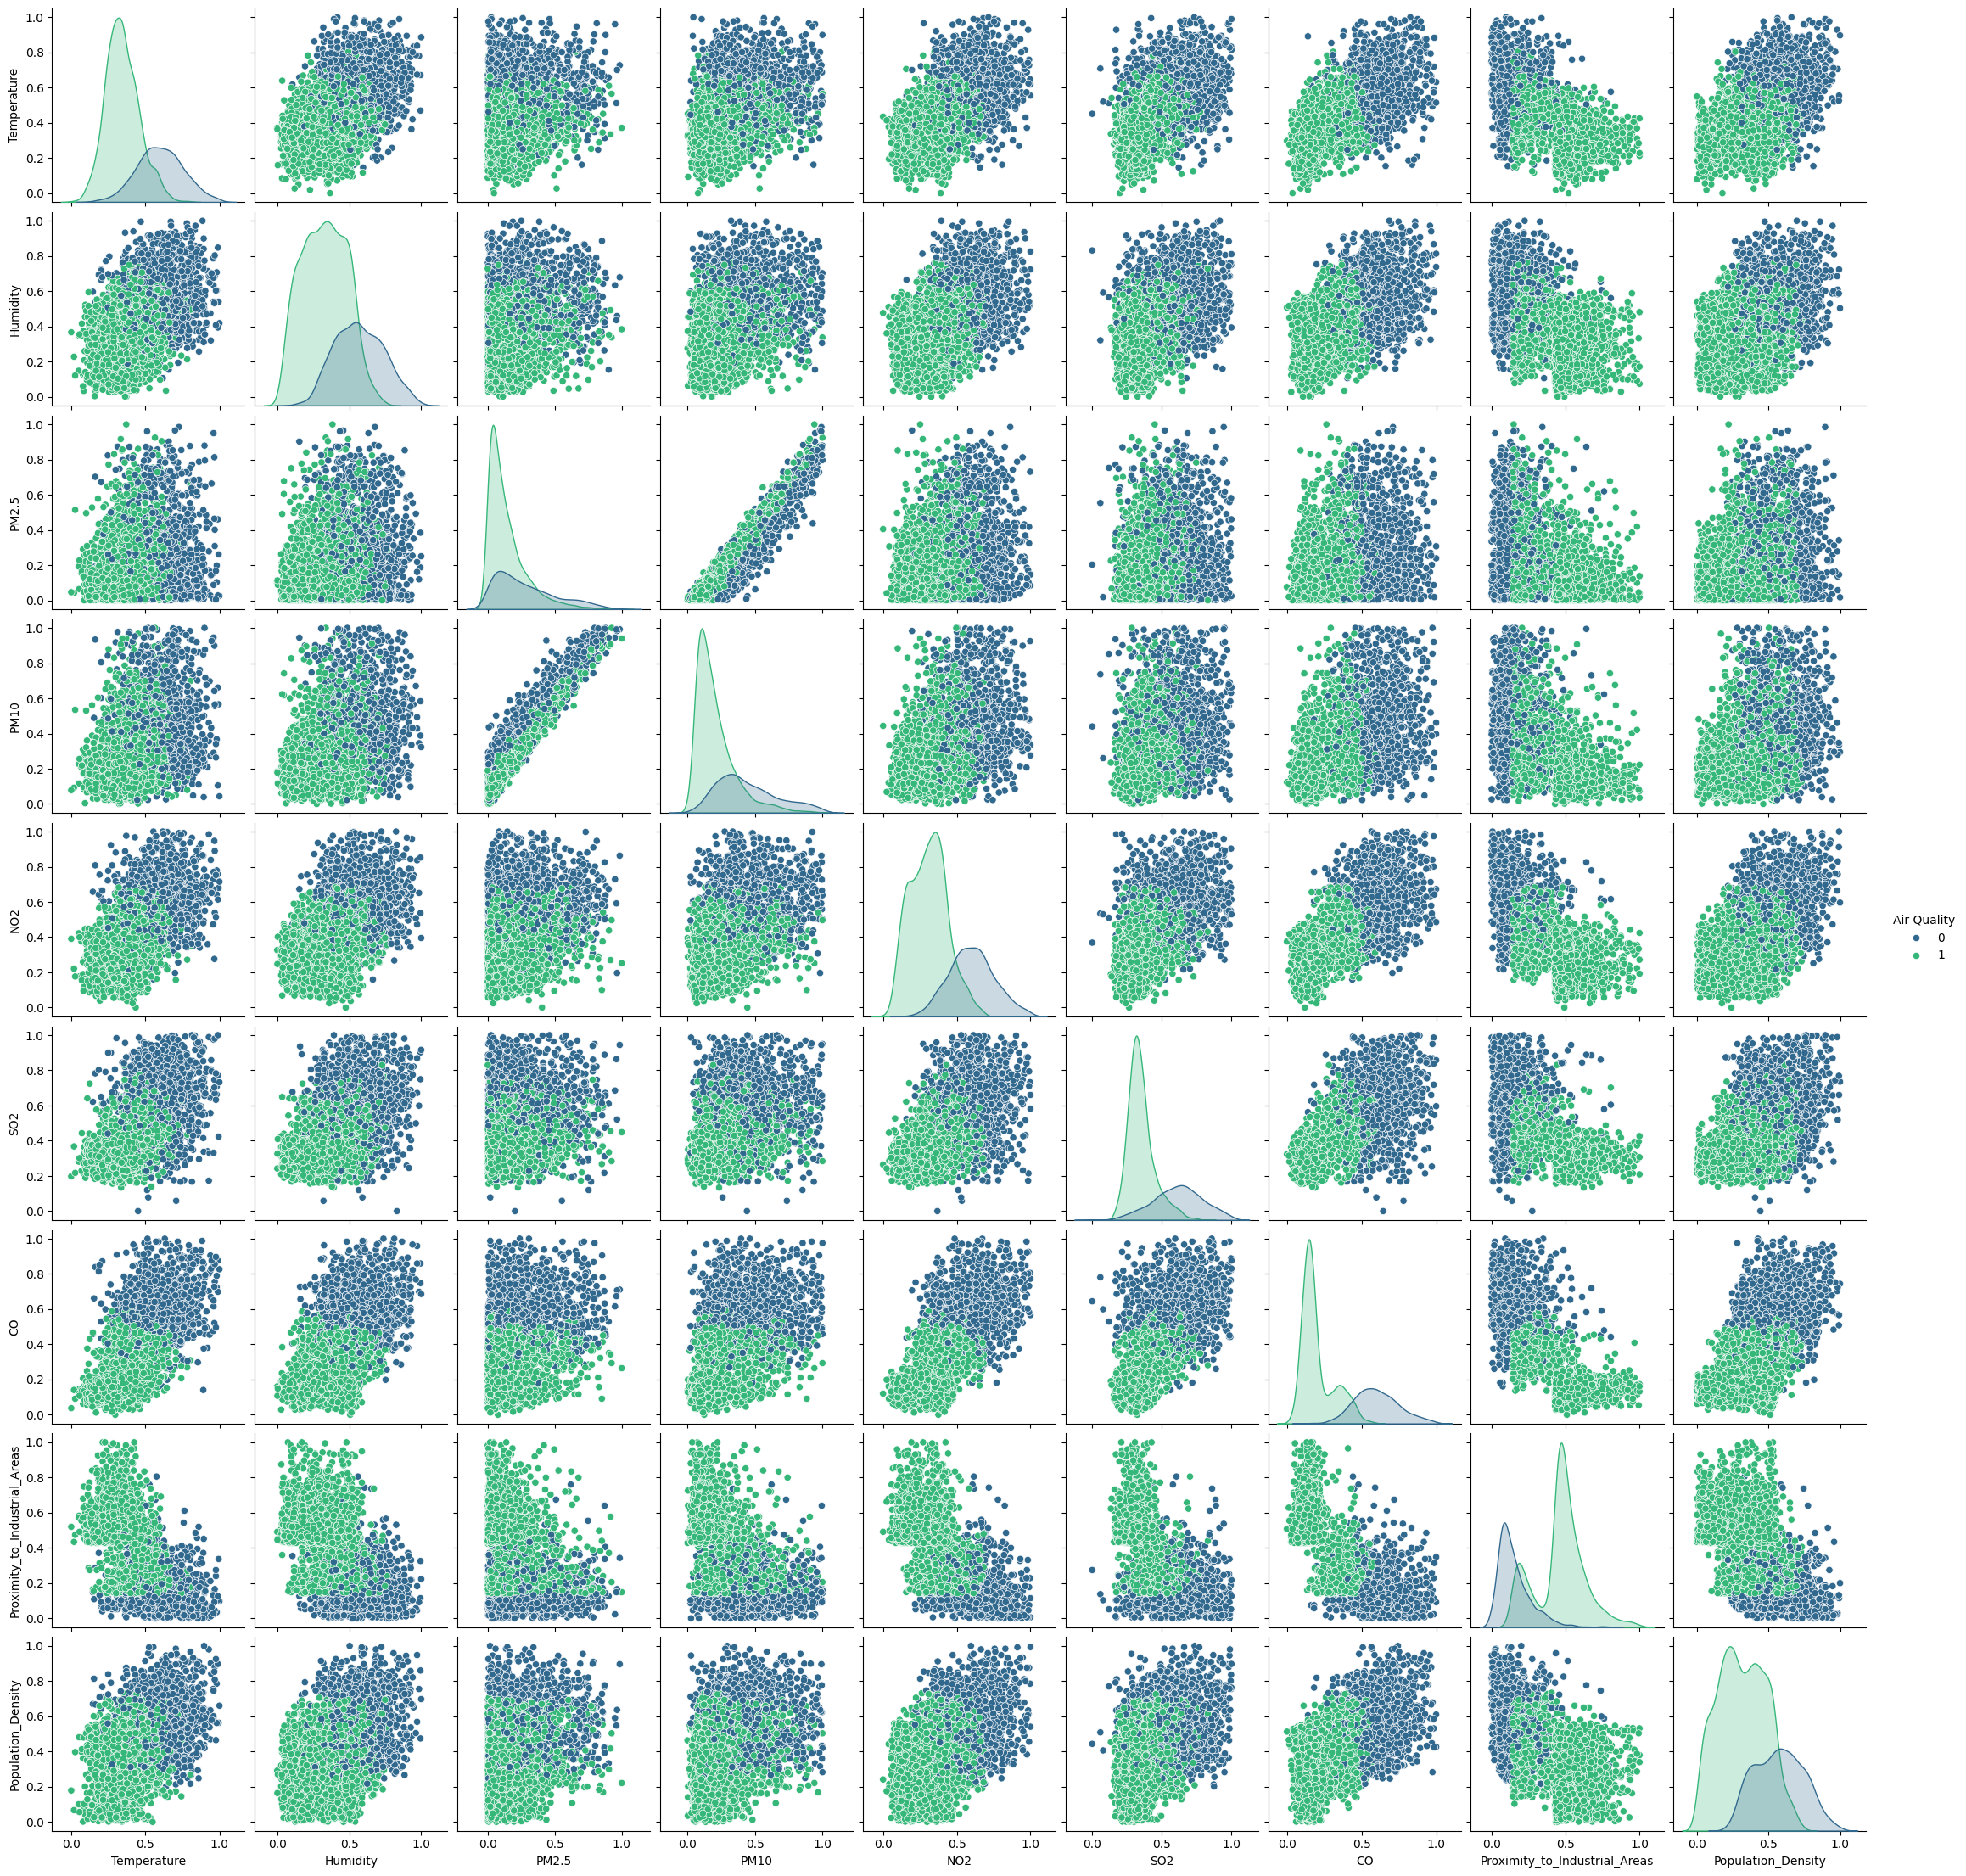

In [24]:
#Multivariate Analysis
#PairPlot to explore relationships between features
sns.pairplot(df, hue='Air Quality', palette='viridis')
plt.show()

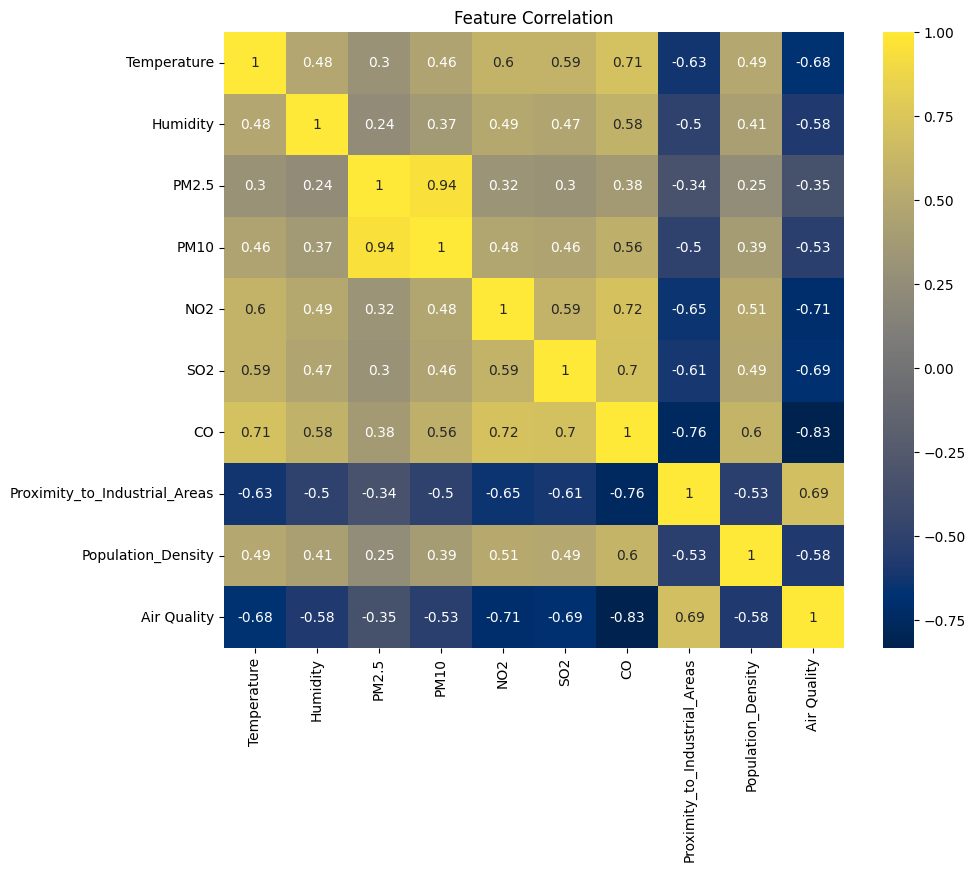

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.title('Feature Correlation')
plt.show()

In [26]:
df['Avg_Pollution'] = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].mean(axis=1)
df['Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']

In [27]:
new_features = ['Avg_Pollution', 'Temp_Humidity_Interaction']
df[new_features].head()

Avg_Pollution  Temp_Humidity_Interaction
0       0.160574                   0.013856
1       0.210658                   0.148309
2       0.499004                   0.514060
3       0.343621                   0.429346
4       0.454347                   0.301728

In [28]:
features += new_features

In [29]:
df[features].head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.363395  0.038130  0.070766  0.070499  0.134658  0.320334  0.206612   
1     0.347480  0.426814  0.080046  0.175705  0.320088  0.328691  0.148760   
2     0.689655  0.745387  0.169374  0.387202  0.783664  0.671309  0.483471   
3     0.750663  0.571956  0.019722  0.173536  0.523179  0.526462  0.475207   
4     0.424403  0.710947  0.119490  0.248373  0.832230  0.501393  0.570248   

   Proximity_to_Industrial_Areas  Population_Density  Avg_Pollution  \
0                       0.491429            0.483356       0.160574   
1                       0.582857            0.153129       0.210658   
2                       0.034286            0.647137       0.499004   
3                       0.120000            0.728362       0.343621   
4                       0.165714            0.396804       0.454347   

   Temp_Humidity_Interaction  
0                   0.013856  
1                   0.148309  
2                   0.514060  
3                   0.429346  
4                   0.301728

In [30]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [31]:
X = df[features]
Y = df['Air Quality']

<Axes: >

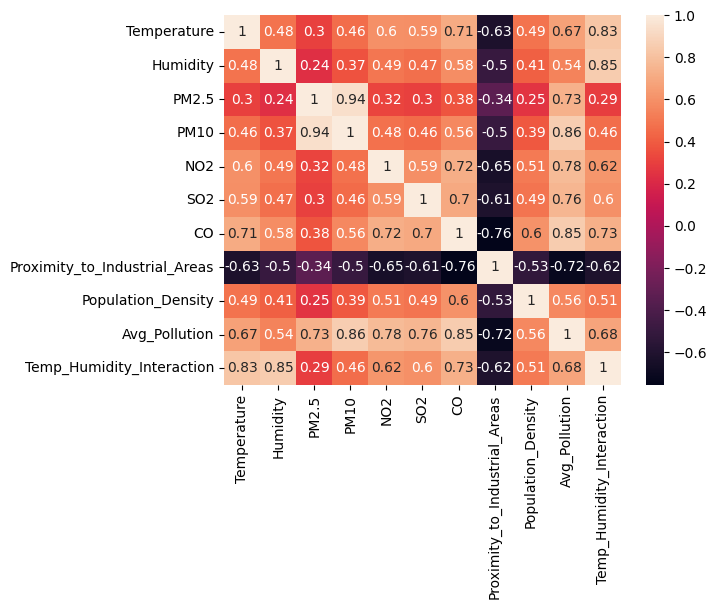

In [32]:
sns.heatmap(X.corr(), annot=True)

In [33]:
#Select top k features based on Chi-Squared statistic
k = 5
chi2_selector = SelectKBest(chi2, k=k)
x_chi2_selected = chi2_selector.fit_transform(X,Y)

In [34]:
chi2_support = chi2_selector.get_support()
selected_features_chi2 = [feature for feature, selected in zip(features, chi2_support) if selected]
print("The top K features selected: ", selected_features_chi2)

The top K features selected:  ['NO2', 'CO', 'Proximity_to_Industrial_Areas', 'Avg_Pollution', 'Temp_Humidity_Interaction']


In [35]:
mutual_info_selector = SelectKBest(mutual_info_classif, k=k)
X_mutual_info_selected = mutual_info_selector.fit_transform(X,Y)

In [36]:
mutual_info_support = mutual_info_selector.get_support()
selected_features_mutual_info = [feature for feature, selected in zip(features, mutual_info_support) if selected]

In [37]:
print("Top features selected using Mutual Information: ", selected_features_mutual_info)

Top features selected using Mutual Information:  ['NO2', 'CO', 'Proximity_to_Industrial_Areas', 'Avg_Pollution', 'Temp_Humidity_Interaction']


In [38]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

Feature importances from Gradient Boosting:
CO                               0.708404
Proximity_to_Industrial_Areas    0.106670
Avg_Pollution                    0.079718
Temp_Humidity_Interaction        0.032799
NO2                              0.028501
SO2                              0.017594
Temperature                      0.009924
Population_Density               0.008412
Humidity                         0.006372
PM10                             0.000932
PM2.5                            0.000674
dtype: float64


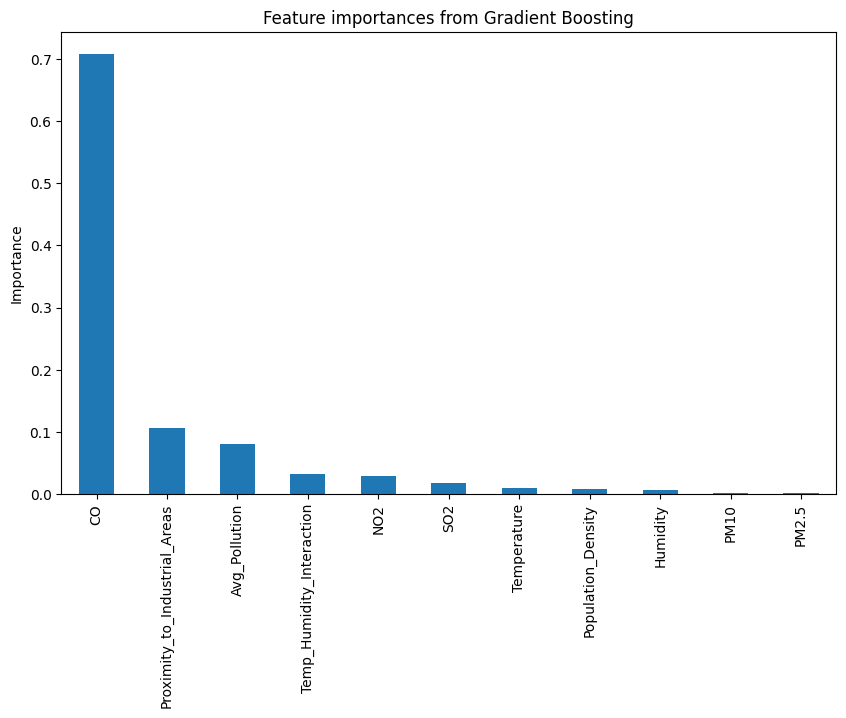

In [39]:
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X,Y)

feature_importances = pd.Series(clf_gb.feature_importances_, 
                                index=features).sort_values(ascending=False)
print("Feature importances from Gradient Boosting:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from Gradient Boosting')
plt.ylabel('Importance')
plt.show()


Feature importances from Random Forest:
CO                               0.287649
Avg_Pollution                    0.199178
Temp_Humidity_Interaction        0.123962
Proximity_to_Industrial_Areas    0.121850
NO2                              0.096816
SO2                              0.057227
Temperature                      0.048695
Population_Density               0.026977
Humidity                         0.017730
PM2.5                            0.011754
PM10                             0.008163
dtype: float64


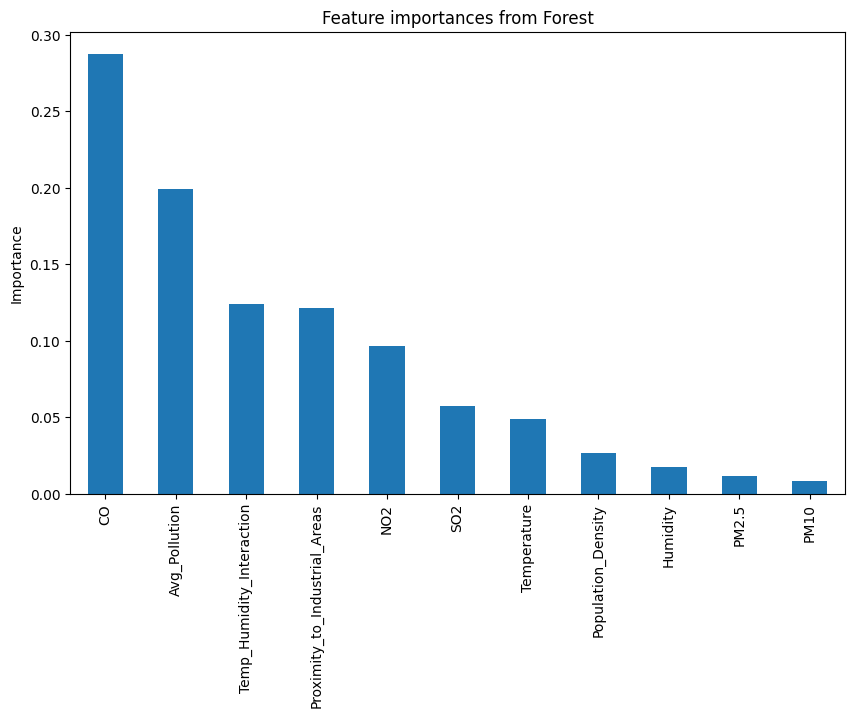

In [40]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X,Y)

feature_importances = pd.Series(clf_rf.feature_importances_, 
                                index=features).sort_values(ascending=False)
print("Feature importances from Random Forest:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from Forest')
plt.ylabel('Importance')
plt.show()

Feature importances from ExtraTreesClassifier Forest:
CO                               0.572934
SO2                              0.188885
Temp_Humidity_Interaction        0.046011
Proximity_to_Industrial_Areas    0.038341
NO2                              0.032096
Avg_Pollution                    0.028010
Humidity                         0.027994
Population_Density               0.027150
Temperature                      0.015052
PM2.5                            0.014927
PM10                             0.008598
dtype: float64


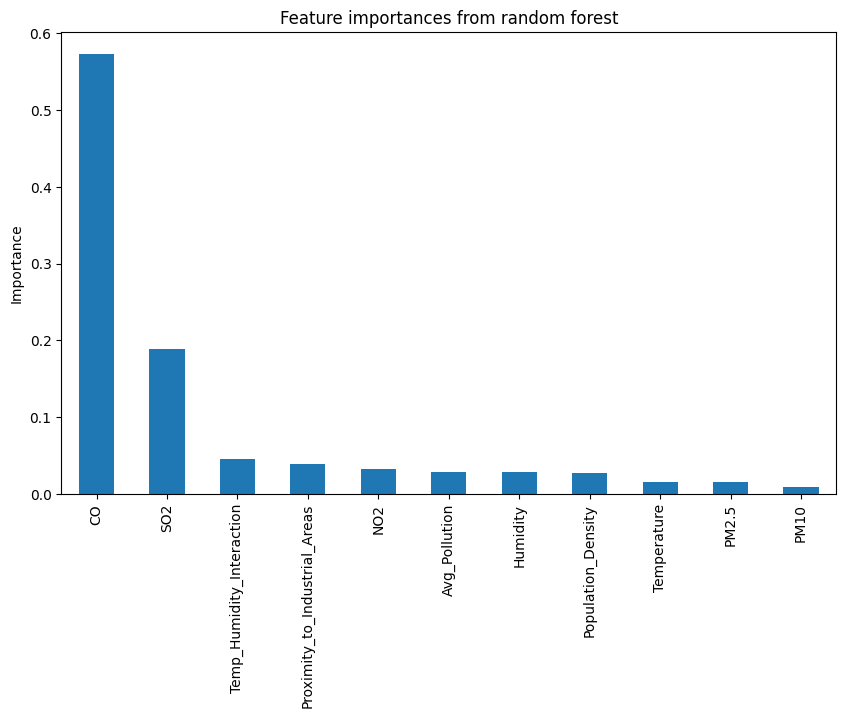

In [41]:
extraTreeClassifier = ExtraTreeClassifier(random_state=42)
extraTreeClassifier.fit(X,Y)

feature_importances = pd.Series(extraTreeClassifier.feature_importances_, 
                                index=features).sort_values(ascending=False)
print("Feature importances from ExtraTreesClassifier Forest:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from random forest')
plt.ylabel('Importance')
plt.show()

In [42]:
X = pd.DataFrame(x_chi2_selected, columns = selected_features_chi2)

In [43]:
X.head()

NO2        CO  Proximity_to_Industrial_Areas  Avg_Pollution  \
0  0.134658  0.206612                       0.491429       0.160574   
1  0.320088  0.148760                       0.582857       0.210658   
2  0.783664  0.483471                       0.034286       0.499004   
3  0.523179  0.475207                       0.120000       0.343621   
4  0.832230  0.570248                       0.165714       0.454347   

   Temp_Humidity_Interaction  
0                   0.013856  
1                   0.148309  
2                   0.514060  
3                   0.429346  
4                   0.301728

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42, stratify = Y)

In [46]:
type(X_train), X_train.iloc[0,:]

(pandas.core.frame.DataFrame,
 NO2                              0.362031
 CO                               0.351240
 Proximity_to_Industrial_Areas    0.148571
 Avg_Pollution                    0.431357
 Temp_Humidity_Interaction        0.181194
 Name: 3483, dtype: float64)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
rf_model = RandomForestClassifier(max_depth=5, random_state = 42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [50]:
rf_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(Y_test, rf_predictions)
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)
rf_class_report = classification_report(Y_test, rf_predictions)

In [51]:
print('Test accuracy: ', rf_test_accuracy)
print('Train Accuracy: ',rf_train_accuracy)
print('Confusion Matrix: \n', rf_conf_matrix)
print('Classification Report: \n', rf_class_report)

Test accuracy:  0.9759797724399494
Train Accuracy:  0.9826004428978171
Confusion Matrix: 
 [[235  10]
 [  9 537]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       245
           1       0.98      0.98      0.98       546

    accuracy                           0.98       791
   macro avg       0.97      0.97      0.97       791
weighted avg       0.98      0.98      0.98       791



In [52]:
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [53]:
lr_predictions = lr_model.predict(X_test)
lr_test_accuracy = accuracy_score(Y_test, lr_predictions)
lr_train_accuracy = accuracy_score(Y_train,lr_model.predict(X_train))
lr_conf_matrix = confusion_matrix(Y_test, lr_predictions)
lr_class_report = classification_report(Y_test, lr_predictions)

In [54]:
print('Test accuracy: ', lr_test_accuracy)
print('Train accuracy: ', lr_train_accuracy)
print('Confusion Matrix: \n', lr_conf_matrix)
print('Classification Report: \n', lr_class_report)

Test accuracy:  0.9709228824273072
Train accuracy:  0.9658335969629864
Confusion Matrix: 
 [[233  12]
 [ 11 535]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       245
           1       0.98      0.98      0.98       546

    accuracy                           0.97       791
   macro avg       0.97      0.97      0.97       791
weighted avg       0.97      0.97      0.97       791



In [55]:
#Both models output the predicted probabilities using the predicted_proba() method.
rf_prob = rf_model.predict_proba(X_test)[:, 1]
lr_prob = lr_model.predict_proba(X_test)[:, 1]

In [56]:
#calculate the False positive rates and true positive rates
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_prob)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_prob)

In [57]:
#Calculate the AUC value
rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

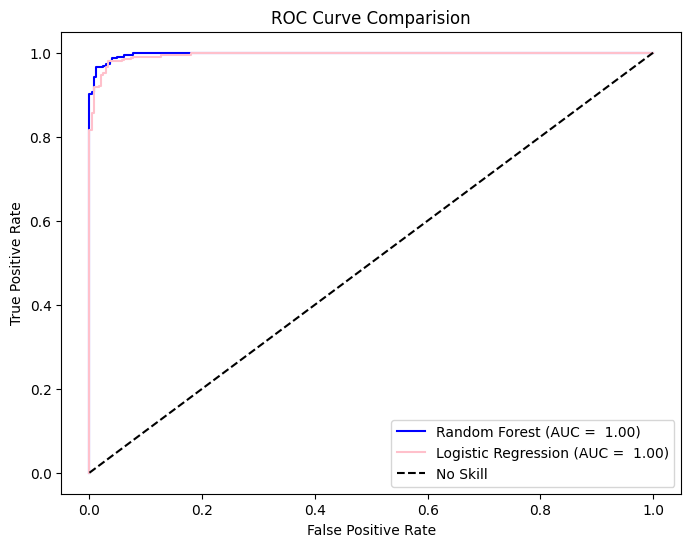

In [58]:
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label = f"Random Forest (AUC = {rf_auc: .2f})", color = "blue")
plt.plot(lr_fpr, lr_tpr, label = f"Logistic Regression (AUC = {lr_auc: .2f})", color = "pink")
plt.plot([0,1], [0,1], 'k--', label = 'No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparision')
plt.legend()
plt.show()

In [59]:
#HyperParameter Tuning for Random forest
from sklearn.model_selection import GridSearchCV
param_grid ={
    'n_estimators': [100,200,300],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [60]:
grid_search = GridSearchCV(estimator= rf_model, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train,Y_train)
best_model=grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [61]:
best_model

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [62]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
#Evaluate best model
y_pred_best = grid_search.best_estimator_.predict(X_test)
best_test_accuracy = accuracy_score(Y_test, y_pred_best)
best_train_accuracy = accuracy_score(Y_train,grid_search.best_estimator_.predict(X_train))

In [64]:
print(f"Tuned Random forest Model Train Accuracy: {best_train_accuracy}")
print(f"Tuned Random forest Model Test Accuracy: {best_test_accuracy}")

Tuned Random forest Model Train Accuracy: 0.981335020563113
Tuned Random forest Model Test Accuracy: 0.97724399494311


In [65]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import make_scorer

#Cross-Validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(
    best_model,
    np.concatenate((X_train, X_test), axis=0),
    np.concatenate((Y_train, Y_test), axis=0),
    cv = k_folds,
    scoring=scoring,
    return_train_score=True
)

In [66]:
#This loop iterates over each metric in scoring and prints the mean and Standard deviation for both training and testing scores.
for metric in scoring:
   print(f"{metric.capitalize()} (Train): {cv_results['train_' + metric].mean():.4f} ± {cv_results['train_' + metric].std():.4f}")
   print(f"{metric.capitalize()} (Test): {cv_results['test_' + metric].mean():.4f} ± {cv_results['test_' + metric].std():.4f}")

Accuracy (Train): 0.9827 ± 0.0015
Accuracy (Test): 0.9747 ± 0.0052
Precision (Train): 0.9844 ± 0.0020
Precision (Test): 0.9796 ± 0.0040
Recall (Train): 0.9906 ± 0.0008
Recall (Test): 0.9839 ± 0.0054
F1 (Train): 0.9875 ± 0.0011
F1 (Test): 0.9817 ± 0.0036


In [67]:
train_accuracy = cv_results['train_accuracy'].mean()
test_accuracy = cv_results['test_accuracy'].mean()

In [68]:
train_accuracy

0.9826669756186093

In [69]:
test_accuracy

0.9746976267823136

In [70]:
if train_accuracy > 0.9 and train_accuracy - test_accuracy > 0.1:
   print("The model is overfitting (High Variance).")
elif train_accuracy < 0.7:
   print("The model is underfitting (High Bias).")
else:
   print("The model has a good balance between bias and variance.")

The model has a good balance between bias and variance.


In [71]:
import pickle
with open('Air_Quality.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [72]:
# Load the model from the .pkl file
with open('Air_Quality.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [73]:
loaded_model

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [74]:
df.iloc[228,:]

Temperature                      0.315650
Humidity                         0.504305
PM2.5                            0.053364
PM10                             0.123644
NO2                              0.280353
SO2                              0.350975
CO                               0.157025
Proximity_to_Industrial_Areas    0.502857
Population_Density               0.125166
Air Quality                      1.000000
Avg_Pollution                    0.193072
Temp_Humidity_Interaction        0.159184
Name: 255, dtype: float64

In [77]:
from sklearn.model_selection import learning_curve

In [80]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=k_folds, scoring='accuracy', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean-test_std,test_mean+test_std, alpha=0.1)

    plt.title(title)
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')

    plt.legend()
    plt.show()

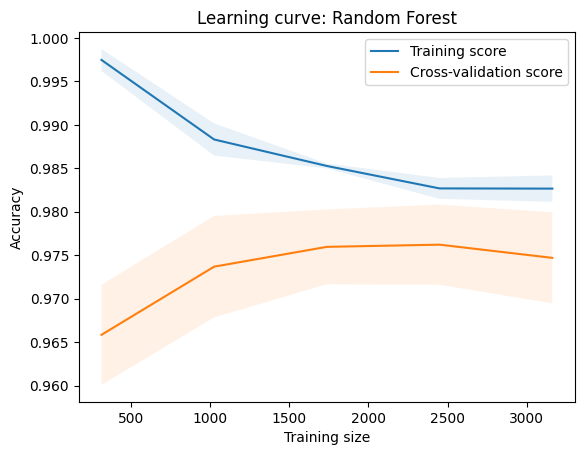

In [82]:
plot_learning_curve(best_model, np.concatenate((X_train, X_test), axis=0), np.concatenate((Y_train, Y_test), axis=0), "Learning curve: Random Forest")